<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/FileMedication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import pandas as pd
hemo = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Hemodialysis.csv', encoding='latin1')

In [113]:
import pandas as pd
prescription = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Prescription.csv')
prescription.shape

(9530452, 10)

In [114]:
# Create a list from hemo['PatientUID']
patient_uid_list = hemo['PatientUID'].unique().tolist()
# Remove patient UIDs from visit['PatientUID'] that are not in the list
prescription = prescription[~prescription['PatientUID'].isin(patient_uid_list)]
prescription.shape

(7845039, 10)

In [115]:
df1 = pd.DataFrame(prescription)

# **DrugSummaryDF**


In [116]:
df = pd.DataFrame(prescription)

In [117]:
import pandas as pd
import re

# Lowercase and store values from 'DrugName' column
drugCol1 = [str(i).lower() for i in df['DrugName']]

# Lowercase and store values from 'GenericName' column
genericCol1 = [str(i).lower() for i in df['GenericName']]

# Store drug names
drugCol2 = []
genericCol2 = []

# Process 'DrugName' column
for value in drugCol1:
    if isinstance(value, str):
        if value[0].isdigit():
            drugCol2.append(value)
        else:
            valList = value.split()
            index_begin_with_digit = len(valList)
            for i in range(len(valList)):
                if valList[i][0].isdigit():
                    index_begin_with_digit = i
                    break
            newval = " ".join(valList[:index_begin_with_digit])
            drugCol2.append(newval)

# Process 'GenericName' column
for value in genericCol1:
    if isinstance(value, str):
        if value[0].isdigit():
            genericCol2.append(value)
        else:
            valList = value.split()
            index_begin_with_digit = len(valList)
            for i in range(len(valList)):
                if valList[i][0].isdigit():
                    index_begin_with_digit = i
                    break
            newval = " ".join(valList[:index_begin_with_digit])
            genericCol2.append(newval)

# Replace unwanted words and remove words starting with 'no.' and the digits following them
words_to_remove = ['inj', 'cap', 'mg', 'ml', 'tab', '[7402]', '[5702]', '[5703]', '[0604]', '[5606]', '[024840]', '[napha]', '[5704]', '(ฝาก)', '(เลิกใช้)']

drugCol3 = []
for i in drugCol2:
    for word in words_to_remove:
        i = i.replace(word, "")
    i = re.sub(r'\bno\.\d+(\.\d+)?\b', '', i)
    drugCol3.append(i.strip())

In [118]:
genericCol3 = []
for i in genericCol2:
    for word in words_to_remove:
        i = i.replace(word, "")
    i = re.sub(r'\bno\.\d+(\.\d+)?\b', '', i)
    genericCol3.append(i.strip())

In [119]:
# Create DataFrame with 'DrugName' and 'GenericName' columns
df_combined = pd.DataFrame({'DrugName': drugCol3, 'GenericName': genericCol3})

# Count unique values for 'DrugName'
drug_value_counts = df_combined['DrugName'].value_counts()

# Count unique values for 'GenericName'
generic_value_counts = df_combined['GenericName'].value_counts()

In [120]:
pre_drug = df_combined['DrugName'].value_counts().reset_index()
pre_drug.columns = ['DrugName', 'Count']

pre_generic = df_combined['GenericName'].value_counts().reset_index()
pre_generic.columns = ['GenericName', 'Count']

pre_count = df_combined.groupby(['DrugName', 'GenericName']).size().reset_index()
pre_count.columns = ['DrugName', 'GenericName', 'Count']

In [121]:
DrugSummary = pd.DataFrame(pre_count)
DrugSummary #4517

,DrugName,GenericName,Count
0,2% chlorhexidine in 70% alcohol 450,2% chlorhexidine in 70% alcohol 500,31
1,3tc 150,3tc 150,720
2,3tc 300,lamivir,268
3,3tc lamivudine 150,lamivudine mylan film-coated,10109
4,5-fu 10/0.2 . for subconjunctival,5-fu 10/0.2 . for subconjunctival,19
...,...,...,...
4512,ไหมเย็บเนื้อเยื่อเข้ากับสมอยึดตรีงกระดูก(ultra...,nan,4
4513,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากพ...,nan,1
4514,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากโ...,nan,1
4515,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากโ...,nan,1


In [122]:
#DrugSummary = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Assign/Assign 4 : ReCountValue/DrugSummary.csv')

In [123]:
#df_combined = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Assign/Assign 4 : ReCountValue/df_combined.csv')

# **Slope**
> **ค่า x = ค่าจากวิสิท t ที่มาก่อน**

In [124]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/Slope.xlsx')

In [125]:
data = pd.DataFrame(slope)
data = data[['PatientUID','PatientVisitUID','Slopes']]
data = data.dropna()

In [126]:
df = pd.DataFrame(data)

# Sort the DataFrame by PatientUID and PatientVisitUID
df = df.sort_values(by=['PatientUID', 'PatientVisitUID'])

# Create a new column to store the previous slope value
df['PreviousSlope'] = df['Slopes'].shift(1)

# Update the Slopes column with the PreviousSlope values
df['Slopes'] = df['PreviousSlope']

# Drop the PreviousSlope column
df = df.drop(columns=['PreviousSlope'])
data = df.dropna()

## **Update Cleaned Value**
>> **into PrescriptionDF**

In [127]:
prescription.update(df_combined)

# **DrugList**

In [128]:
prescription_mapping = {
    'Anti-hypertensive1': [2607,4452,8,528,529],
    'Anti-hypertensive2': [1207,1367,1368,2466,2467,174,1474,661],
    'Anti-hypertensive3': [877,878,1393,1320],
    'Anti-hypertensive4': [658,1216],
    'Anti-hypertensive5': [961,962,963,964,965,123,1100,431,1509],
    'Anti-hypertensive6': [2161],
    'Anti-hypertensive7': [1463,1834,1866,362,506],
    'Anti-hypertensive8': [696,370,371],
    'Anti-hypertensive9': [1096,94,1494,1495,1496],
    'Anti-hyperglycemic1': [117,1000,1001,1002,1003,634,635,636],
    'Anti-hyperglycemic2': [1235,2071,2579,46,1007,1008,1009],
    'Anti-hyperglycemic3': [1235,1236,2604,2380,1699,1021,2597],
    'Anti-hyperglycemic4': [1783,1699,45,46],
    'Anti-hyperglycemic5': [1380,1237,1021,1200,944],
    'Anti-hyperglycemic6': [1166,1167,1168,1169,1306,2366,1639,1640,1641,1503],
    'Anti-hyperglycemic7': [1715],
    'Anti-lipid1': [206,207,208,209,1468,2003,2094,1352,539,1345,2542],
    'Anti-lipid2': [861,862],
    'Anti-lipid3': [883,884,885],
    'Anti-hyperuricemia1': [106,107],
    'Anti-hyperuricemia2': [874],
    'Anti-hyperuricemia3': [1850,257],
    'OtherMedication1': [1263],
    'OtherMedication2': [642,643,396,1119,1120,1121,1122,1123,1401,1430,814,180,1558]
}


In [129]:
# Create new columns for labels
prescription['LabelDrug'] = ""
prescription['LabelGeneric'] = ""

# Iterate through the prescription_mapping dictionary and update 'LabelDrug' and 'LabelGeneric' columns
for prescription_name, indices in prescription_mapping.items():
    result_item_names = pre_count[pre_count.index.isin(indices)]['DrugName'].tolist()
    result_generic_names = pre_count[pre_count.index.isin(indices)]['GenericName'].tolist()
    prescription.loc[prescription['DrugName'].isin(result_item_names), 'LabelDrug'] = prescription_name
    prescription.loc[prescription['GenericName'].isin(result_generic_names), 'LabelGeneric'] = prescription_name

In [130]:
pre0 = pd.DataFrame(prescription)

### **Define** ✔
```
we won't use the #26 values that have fill the label as
mapping value but not the index we want for example:
```
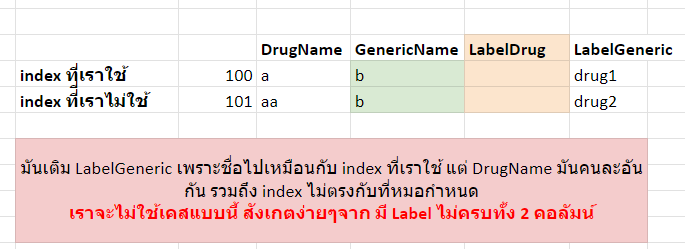

> **Re-Check Mapping**

In [131]:
pre0.loc[(pre0['LabelDrug'] == '') & (pre0['LabelGeneric'] == '')] #6626350

,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration,LabelDrug,LabelGeneric
0,2299,2024049,2558-02-19 14:48:15.693,folic acid,folivit,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0,,
1,2299,2024049,2558-02-19 14:48:15.693,vitamin b complex,vitamin b complex,180.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,90.0,,
3,2299,2024049,2558-02-19 14:48:15.693,lorazepam(anxira),anxira,30.0,hs |วันละ 1 ครั้ง ก่อนนอน,1.0,1 TAB,30.0,,
4,2299,2024049,2558-02-19 14:47:55.953,chalk-1.5,chalk,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0,,
5,2299,2024049,2558-02-19 14:47:55.953,vitamin d2,calciferol bd,12.0,Weekly|สัปดาห์ละ 1 ครั้ง,1.0,1 CAP,90.0,,
...,...,...,...,...,...,...,...,...,...,...,...,...
9530447,3437526,10191122,2565-12-27 03:00:00.563,Infusion plabottle set (IV.set),NaN,2.0,NaN,NaN,NaN,1.0,,
9530448,3437526,10191122,2565-12-27 03:00:00.563,Normal Saline 0.9% IV 1000 ml,Normal Saline 0.9% IV 1000 ml,1.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0,,
9530449,3437526,10191122,2565-12-27 03:00:00.563,Normal Saline 0.9% IV 100 ml,Normal Saline 0.9% IV 100 ml,2.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0,,
9530450,3437526,10191122,NaN,Minimun Volume Extension with T connector,NaN,1.0,NaN,NaN,NaN,1.0,,


In [132]:
pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive1')]

,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration,LabelDrug,LabelGeneric
697,2362,7283806,2563-04-20 17:32:23.770,แอนนาพริล(enalapril),anapril,210.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,105.0,Anti-hypertensive1,Anti-hypertensive1
706,2362,7017821,2563-01-13 17:43:39.303,แอนนาพริล(enalapril),anapril,210.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,105.0,Anti-hypertensive1,Anti-hypertensive1
711,2362,6699632,2562-09-30 17:33:02.427,แอนนาพริล(enalapril),anapril,210.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,105.0,Anti-hypertensive1,Anti-hypertensive1
720,2362,6435979,2562-07-08 17:32:37.737,แอนนาพริล(enalapril),anapril,180.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,90.0,Anti-hypertensive1,Anti-hypertensive1
727,2362,6034394,2562-02-25 18:24:46.700,แอนนาพริล(enalapril),anapril,120.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,60.0,Anti-hypertensive1,Anti-hypertensive1
...,...,...,...,...,...,...,...,...,...,...,...,...
7844788,2044233,2874704,2559-02-01 21:54:01.193,แอนนาพริล(enalapril),anapril,1.0,q 24 hr.|ทุก 24 ชั่วโมง,1.0,1 AMP,1.0,Anti-hypertensive1,Anti-hypertensive1
7844795,2044233,2874704,2559-02-01 23:16:02.880,แอนนาพริล(enalapril),anapril,3.0,q 6 hr |ทุก 6 ชั่วโมง,250.0,250 mg,1.0,Anti-hypertensive1,Anti-hypertensive1
7844798,2044233,2874704,2559-02-01 23:16:02.880,แอนนาพริล(enalapril),anapril,2.0,q 24 hr.|ทุก 24 ชั่วโมง,2000.0,2000 mg,1.0,Anti-hypertensive1,Anti-hypertensive1
7844809,2044233,2874704,2559-02-02 14:00:00.000,แอนนาพริล(enalapril),anapril,12.0,q 6 hr |ทุก 6 ชั่วโมง,250.0,250 mg,3.0,Anti-hypertensive1,Anti-hypertensive1


In [133]:
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive1') & (pre0['LabelGeneric'] == 'Anti-hypertensive1')] >> 68274 xx 83390
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive2') & (pre0['LabelGeneric'] == 'Anti-hypertensive2')] >> 73211
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive3') & (pre0['LabelGeneric'] == 'Anti-hypertensive3')] >> 107496
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive4') & (pre0['LabelGeneric'] == 'Anti-hypertensive4')] >> 23247
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive5') & (pre0['LabelGeneric'] == 'Anti-hypertensive5')] >> 50083
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive6') & (pre0['LabelGeneric'] == 'Anti-hypertensive6')] >> 15954 xx 19577
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive7') & (pre0['LabelGeneric'] == 'Anti-hypertensive7')] >> 116065
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive8') & (pre0['LabelGeneric'] == 'Anti-hypertensive8')] >> 58548
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive9') & (pre0['LabelGeneric'] == 'Anti-hypertensive9')] >> 70796

#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic1') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic1')] >> 59277
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic2') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic2')] >> 98835
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic3') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic3')] >> 25071
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic4') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic4')] >> 17393
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic5') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic5')] >> 6888
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic6') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic6')] >> 39211
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic7') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic7')] >> 34 xx 42

#pre0.loc[(pre0['LabelDrug'] == 'Anti-lipid1') & (pre0['LabelGeneric'] == 'Anti-lipid1')] >> 281776
#pre0.loc[(pre0['LabelDrug'] == 'Anti-lipid2') & (pre0['LabelGeneric'] == 'Anti-lipid2')] >> 12455
#pre0.loc[(pre0['LabelDrug'] == 'Anti-lipid3') & (pre0['LabelGeneric'] == 'Anti-lipid3')] >> 6000

#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperuricemia1') & (pre0['LabelGeneric'] == 'Anti-hyperuricemia1')] >> 45639
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperuricemia2') & (pre0['LabelGeneric'] == 'Anti-hyperuricemia2')] >> 1791
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperuricemia3') & (pre0['LabelGeneric'] == 'Anti-hyperuricemia3')] >> 903

#pre0.loc[(pre0['LabelDrug'] == 'OtherMedication1') & (pre0['LabelGeneric'] == 'OtherMedication1')] >> 3419 xx 4169
#pre0.loc[(pre0['LabelDrug'] == 'OtherMedication2') & (pre0['LabelGeneric'] == 'OtherMedication2')] >> 36297

> **ปัญหา value เหมือนแต่คนละ index กะหมอกำหนด ทำให้ ค่า 2 focus column มันไม่ตรงกัน**

In [134]:
#pre0.loc[(pre0['LabelDrug'] != 'Anti-hypertensive5') & (pre0['LabelGeneric'] == 'Anti-hypertensive5')]  #>>FileCount 4049, 1813
#pre0.loc[(pre0['LabelDrug'] != 'Anti-hyperglycemic2') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic2')] #>>FileCount 4447
#pre0.loc[(pre0['LabelDrug'] != 'Anti-lipid2') & (pre0['LabelGeneric'] == 'Anti-lipid2')]                #>>FileCount 296
#pre0.loc[(pre0['LabelDrug'] != 'Anti-hyperuricemia3') & (pre0['LabelGeneric'] == 'Anti-hyperuricemia3')]#>>FileCount 4478



```
continue code
```



In [135]:
prescription = prescription[(prescription['LabelDrug'] == prescription['LabelGeneric']) & (prescription['LabelDrug'] != '')]

In [136]:
prescription

,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration,LabelDrug,LabelGeneric
2,2299,2024049,2558-02-19 14:48:15.693,losartan(loranta),loranta film-coated,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0,Anti-hypertensive2,Anti-hypertensive2
15,2299,2237669,2558-05-21 12:58:52.017,simvastatin(bestatin),bestatin,52.0,hs |วันละ 1 ครั้ง ก่อนนอน,0.5,0.5 TAB,104.0,Anti-lipid1,Anti-lipid1
16,2299,2237669,2558-05-21 12:58:52.017,losartan(loranta),loranta film-coated,104.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,104.0,Anti-hypertensive2,Anti-hypertensive2
22,2299,2480434,2558-08-27 15:27:49.377,losartan(loranta),loranta film-coated,104.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,104.0,Anti-hypertensive2,Anti-hypertensive2
23,2299,2480434,2558-08-27 15:27:49.377,simvastatin(bestatin),bestatin,52.0,hs |วันละ 1 ครั้ง ก่อนนอน,0.5,0.5 TAB,104.0,Anti-lipid1,Anti-lipid1
...,...,...,...,...,...,...,...,...,...,...,...,...
7844800,2044233,2874704,2559-02-02 08:00:00.490,atorvastatin(lipostat),atorvastatin(lipostat),2.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0,Anti-lipid1,Anti-lipid1
7844809,2044233,2874704,2559-02-02 14:00:00.000,แอนนาพริล(enalapril),anapril,12.0,q 6 hr |ทุก 6 ชั่วโมง,250.0,250 mg,3.0,Anti-hypertensive1,Anti-hypertensive1
7844811,2044233,2874704,2559-02-01 23:40:36.457,atorvastatin(lipostat),atorvastatin(lipostat),2.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0,Anti-lipid1,Anti-lipid1
7844814,2044233,2874704,NaN,atorvastatin(lipostat),atorvastatin(lipostat),10.0,NaN,NaN,NaN,1.0,Anti-lipid1,Anti-lipid1



# **DrugWideTable**

In [ ]:
import numpy as np
# Step 1: Add an additional column to distinguish duplicate entries
prescription['DuplicateIndex'] = prescription.groupby(['PatientUID', 'PatientVisitUID']).cumcount()

# Step 2: Pivot the 'lab' DataFrame
prescription_pivoted = prescription.pivot(index=['PatientUID', 'PatientVisitUID', 'DuplicateIndex'], columns='LabelDrug', values='DrugDuration')

# Step 3: Reset the index to match the desired format
prescription_pivoted = prescription_pivoted.reset_index()

# Step 4: Fill NaN values with None using numpy.nan
prescription_pivoted = prescription_pivoted.where(pd.notna(prescription_pivoted), np.nan)

# Step 5: Merge 'CWhen' from 'prescription' into the pivoted DataFrame
final_result = pd.merge(data, prescription_pivoted, on=['PatientUID', 'PatientVisitUID'], how='left')

## **Duplicate column**

**จากการที่มันเป็น Duration ของการใช้ยา เราต้องนำค่ามาบวกกัน**

In [ ]:
final_result[final_result.duplicated(subset=['PatientVisitUID'], keep=False)]

,PatientUID,PatientVisitUID,Slopes,DuplicateIndex,Anti-hyperglycemic1,Anti-hyperglycemic2,Anti-hyperglycemic3,Anti-hyperglycemic4,Anti-hyperglycemic5,Anti-hyperglycemic6,...,Anti-hypertensive8,Anti-hypertensive9,Anti-hyperuricemia1,Anti-hyperuricemia2,Anti-hyperuricemia3,Anti-lipid1,Anti-lipid2,Anti-lipid3,OtherMedication1,OtherMedication2
0,2299,5812902,-7.158596,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
1,2299,5812902,-7.158596,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN
2,2299,5812902,-7.158596,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2299,5812902,-7.158596,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,2299,6947220,5.550691,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140167,2042819,6096704,14.860714,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140168,2042819,6096704,14.860714,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140169,2042819,6096704,14.860714,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140171,2044050,7986303,-5.853631,0.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_result[final_result['PatientVisitUID']==6432026.0]

,PatientUID,PatientVisitUID,Slopes,DuplicateIndex,Anti-hyperglycemic1,Anti-hyperglycemic2,Anti-hyperglycemic3,Anti-hyperglycemic4,Anti-hyperglycemic5,Anti-hyperglycemic6,...,Anti-hypertensive8,Anti-hypertensive9,Anti-hyperuricemia1,Anti-hyperuricemia2,Anti-hyperuricemia3,Anti-lipid1,Anti-lipid2,Anti-lipid3,OtherMedication1,OtherMedication2
246,4493,6432026,20.002342,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,4493,6432026,20.002342,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,4493,6432026,20.002342,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
249,4493,6432026,20.002342,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,4493,6432026,20.002342,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,4493,6432026,20.002342,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,4493,6432026,20.002342,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,4493,6432026,20.002342,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
254,4493,6432026,20.002342,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,4493,6432026,20.002342,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# List of columns to sum
columns_to_sum = ['Anti-hypertensive2', 'Anti-lipid1', 'OtherMedication2', 'Anti-hypertensive5',
                  'Anti-hypertensive7', 'Anti-hypertensive3', 'Anti-hypertensive6',
                  'Anti-hypertensive1', 'Anti-hyperglycemic2', 'Anti-hyperglycemic3',
                  'Anti-hyperglycemic1', 'Anti-lipid3', 'Anti-hyperglycemic5',
                  'Anti-hyperuricemia1', 'Anti-hypertensive9', 'Anti-hypertensive8',
                  'Anti-hyperglycemic6', 'Anti-hyperglycemic4', 'Anti-hyperuricemia2',
                  'Anti-lipid2', 'Anti-hypertensive4', 'OtherMedication1',
                  'Anti-hyperglycemic7', 'Anti-hyperuricemia3']

# Group by the specified columns and sum the values in the specified columns
sumdf = final_result.groupby(['PatientUID', 'PatientVisitUID', 'Slopes'])[columns_to_sum].sum().reset_index()


# **check**

In [ ]:
sumdf.columns

Index(['PatientUID', 'PatientVisitUID', 'Slopes', 'Anti-hypertensive2',
       'Anti-lipid1', 'OtherMedication2', 'Anti-hypertensive5',
       'Anti-hypertensive7', 'Anti-hypertensive3', 'Anti-hypertensive6',
       'Anti-hypertensive1', 'Anti-hyperglycemic2', 'Anti-hyperglycemic3',
       'Anti-hyperglycemic1', 'Anti-lipid3', 'Anti-hyperglycemic5',
       'Anti-hyperuricemia1', 'Anti-hypertensive9', 'Anti-hypertensive8',
       'Anti-hyperglycemic6', 'Anti-hyperglycemic4', 'Anti-hyperuricemia2',
       'Anti-lipid2', 'Anti-hypertensive4', 'OtherMedication1',
       'Anti-hyperglycemic7', 'Anti-hyperuricemia3'],
      dtype='object')

In [ ]:
sumdf[sumdf['PatientVisitUID']==8186767]

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,G1M9:Vasodilator,G1M8:Alpha blocker,G2M6:Insulin,G2M4:TZD,G4M2:Febuxostat,G3M2:Ezetimibe,G1M4:Non-dihydropyridine CCB,G5M1:Ketoanalog amino acid,G2M7:GLP1-RA,G4M3:Uricosuric agent
2,2299,8186767,-6.06371,100.0,0.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
prescription[prescription['PatientVisitUID']==8186767]

,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration,LabelDrug,LabelGeneric,DuplicateIndex
274,2299,8186767,2564-03-04 12:07:58.707,celebrex,celebrex,60.0,prn|เวลามีอาการ,1.0,1 CAP,14.0,OtherMedication2,OtherMedication2,0
277,2299,8186767,2564-03-04 12:08:19.623,losartan(loranta),loranta film-coated,100.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,100.0,Anti-hypertensive2,Anti-hypertensive2,1
279,2299,8186767,2564-03-04 12:08:25.517,celebrex,celebrex,14.0,prn|เวลามีอาการ,1.0,1 CAP,1.0,OtherMedication2,OtherMedication2,2


In [ ]:
DrugDF = pd.DataFrame(sumdf)

## **Rename Columns**

In [ ]:
column_rename_dict = {
    'Anti-hypertensive1': 'G1M1:ACEI',
    'Anti-hypertensive2': 'G1M2:ARB',
    'Anti-hypertensive3': 'G1M3:Dihydropyridine CCB',
    'Anti-hypertensive4': 'G1M4:Non-dihydropyridine CCB',
    'Anti-hypertensive5': 'G1M5:Diuretic',
    'Anti-hypertensive6': 'G1M6:MRA',
    'Anti-hypertensive7': 'G1M7:Beta blocker',
    'Anti-hypertensive8': 'G1M8:Alpha blocker',
    'Anti-hypertensive9': 'G1M9:Vasodilator',
    'Anti-hyperglycemic1': 'G2M1:SU',
    'Anti-hyperglycemic2': 'G2M2:Metformin',
    'Anti-hyperglycemic3': 'G2M3:DPP4 inhibitor',
    'Anti-hyperglycemic4': 'G2M4:TZD',
    'Anti-hyperglycemic5': 'G2M5:SGLT2i',
    'Anti-hyperglycemic6': 'G2M6:Insulin',
    'Anti-hyperglycemic7': 'G2M7:GLP1-RA',
    'Anti-lipid1': 'G3M1:Statin',
    'Anti-lipid2': 'G3M2:Ezetimibe',
    'Anti-lipid3': 'G3M3:Fibrate',
    'Anti-hyperuricemia1': 'G4M1:Allopurinol',
    'Anti-hyperuricemia2': 'G4M2:Febuxostat',
    'Anti-hyperuricemia3': 'G4M3:Uricosuric agent',
    'OtherMedication1': 'G5M1:Ketoanalog amino acid',
    'OtherMedication2': 'G5M2:NSAIDs'
}
# Use the rename method to rename the columns
DrugDF.rename(columns=column_rename_dict, inplace=True)
DrugDF

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,G1M9:Vasodilator,G1M8:Alpha blocker,G2M6:Insulin,G2M4:TZD,G4M2:Febuxostat,G3M2:Ezetimibe,G1M4:Non-dihydropyridine CCB,G5M1:Ketoanalog amino acid,G2M7:GLP1-RA,G4M3:Uricosuric agent
0,2299,5812902,-7.158596,100.0,100.0,34.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2299,6947220,5.550691,35.0,0.0,1.0,35.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2299,8186767,-6.063710,100.0,0.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2299,9385133,-12.812245,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2304,4916314,28.287500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52615,3319971,10553916,-4.256753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52616,3320048,10572126,-0.692078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52617,3320050,10572565,7.217875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
DrugDF.to_excel('DrugDF.xlsx')